In [1]:
# In[1]:
# Cell 1: Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# In[2]:
# Cell 2: Load and Inspect the Dataset

# Load the data from the CSV file
car_df = pd.read_csv('car data.csv')

# --- 1. Initial Inspection ---
print("--- First 5 Rows of the Dataset ---")
print(car_df.head())
print("\n" + "="*50 + "\n")

print("--- Dataset Information ---")
car_df.info()
print("\n" + "="*50 + "\n")

# Check for missing values
print("--- Missing Values per Column ---")
print(car_df.isnull().sum())
print("\n" + "="*50 + "\n")

# Statistical summary of numerical columns
print("--- Statistical Summary ---")
print(car_df.describe())

--- First 5 Rows of the Dataset ---
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  

--- Starting Exploratory Data Analysis ---


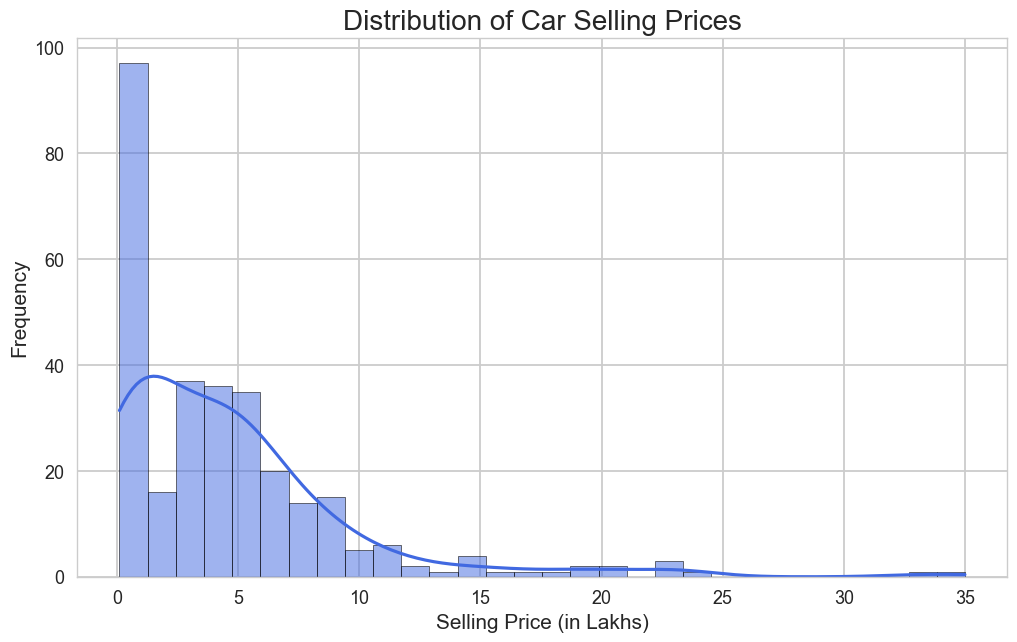


--- Analyzing Categorical Features ---


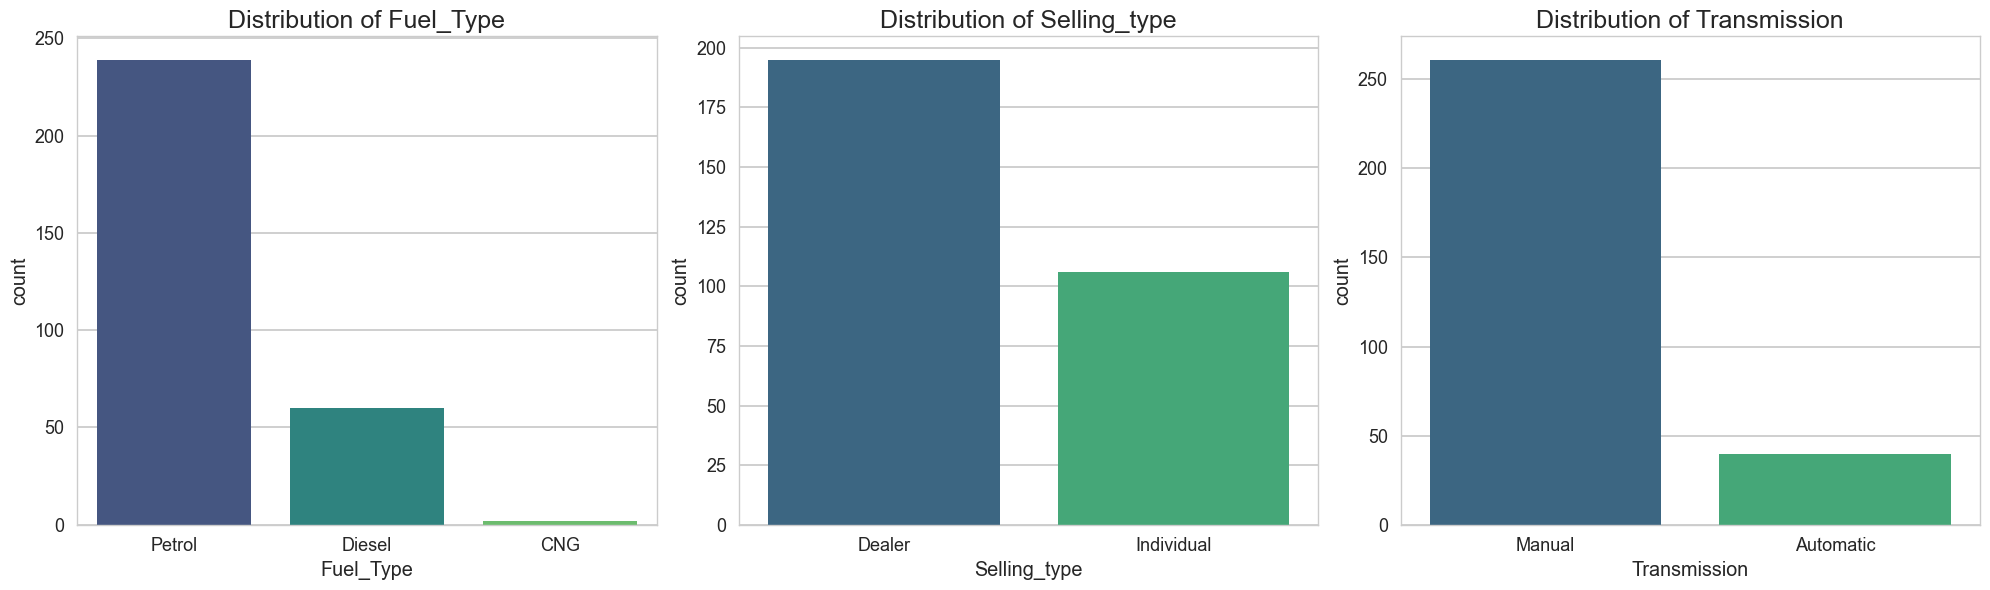

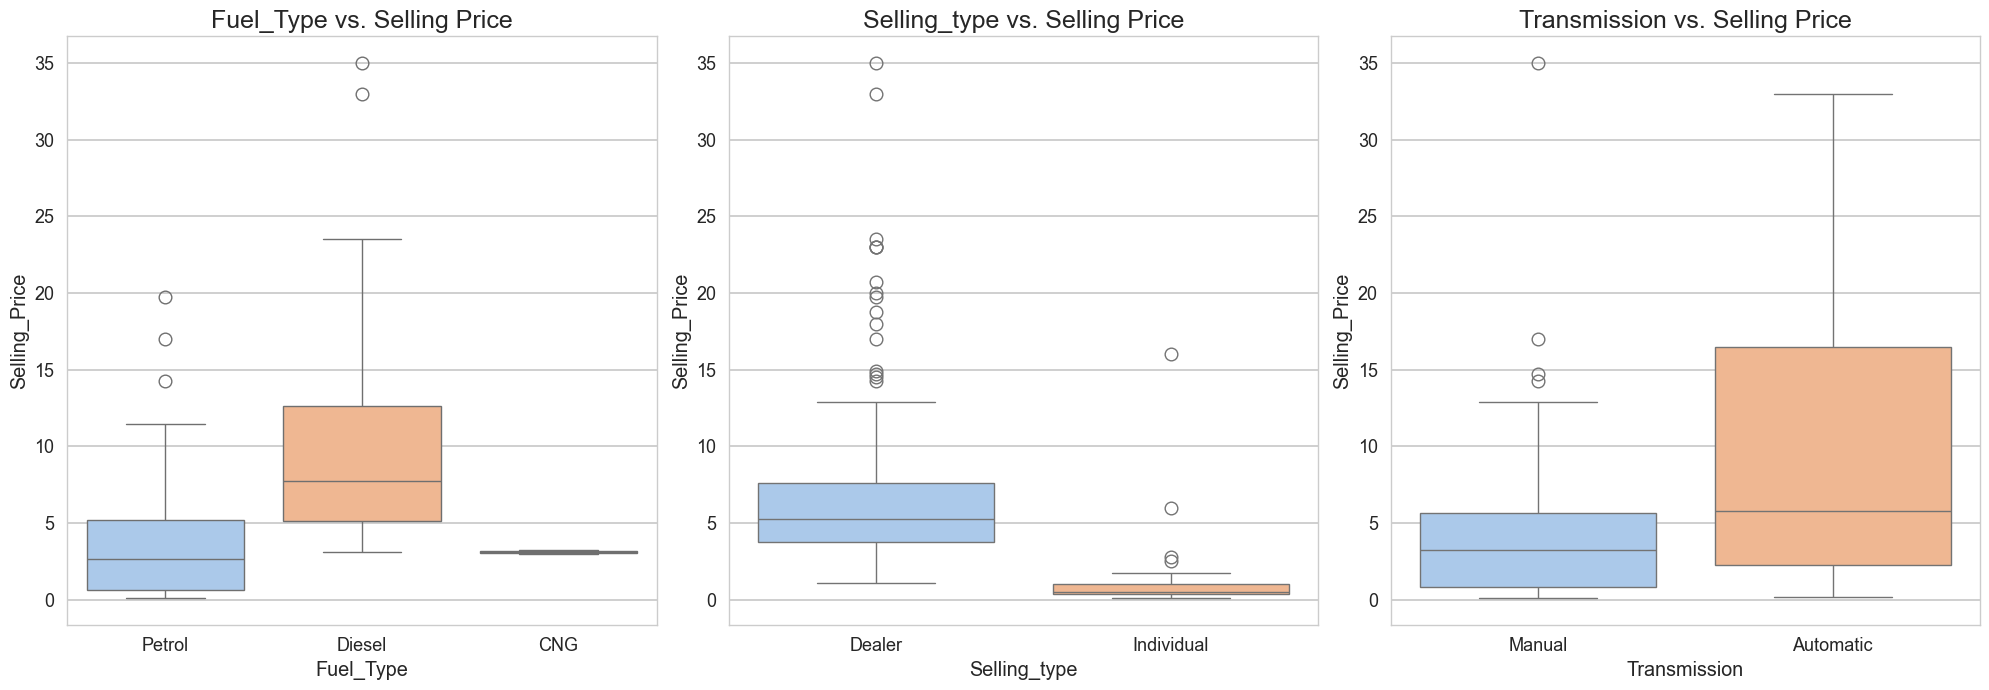


--- Analyzing Numerical Features ---


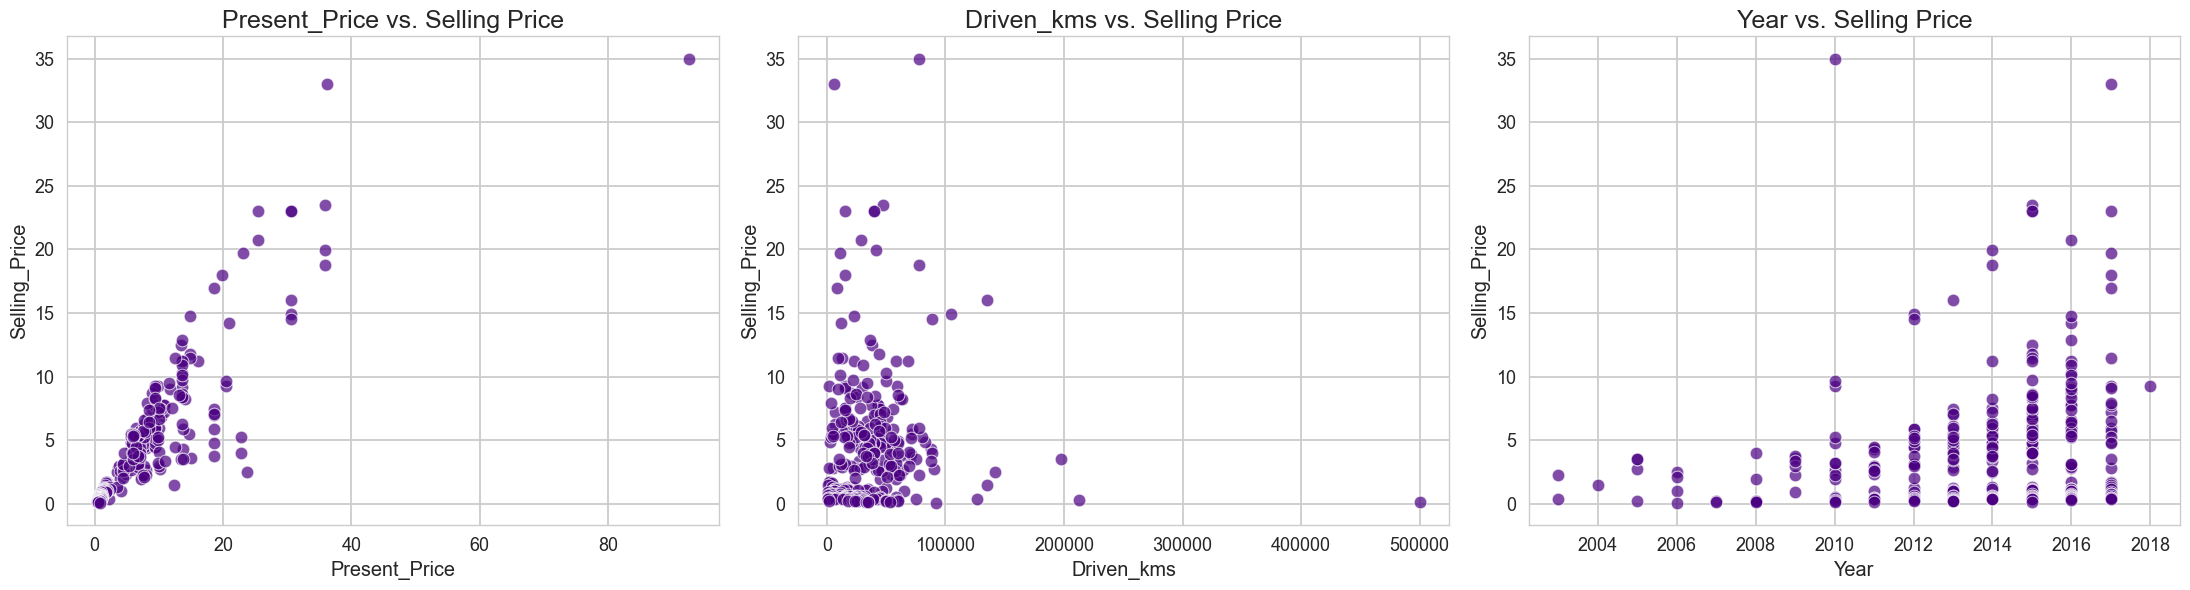


--- Analyzing Feature Correlation ---


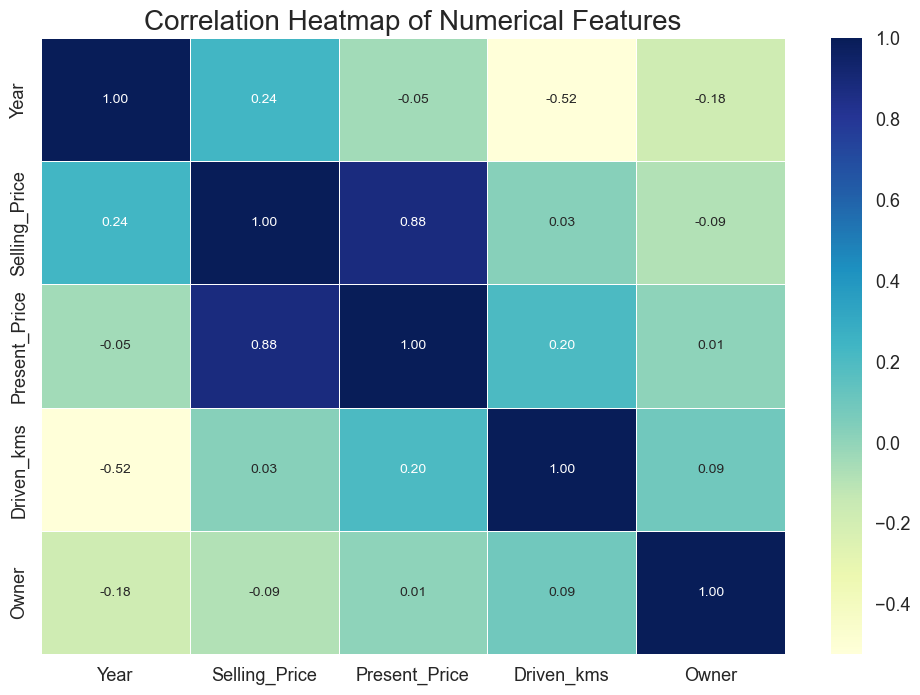


--- EDA Complete ---


In [6]:
# In[3]:
# Cell 3: Exploratory Data Analysis (EDA) 📊 (Revised and Enhanced)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Setup and Style ---
# Using a style with larger fonts for better readability in presentations
plt.style.use('seaborn-v0_8-talk')
print("--- Starting Exploratory Data Analysis ---")


# --- 2. Target Variable Distribution ---
# Understanding the distribution of our primary target, 'Selling_Price'.
plt.figure(figsize=(12, 7))
sns.histplot(car_df['Selling_Price'], kde=True, bins=30, color='royalblue')
plt.title('Distribution of Car Selling Prices', fontsize=20)
plt.xlabel('Selling Price (in Lakhs)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


# --- 3. Categorical Feature Analysis ---
print("\n--- Analyzing Categorical Features ---")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

# First, let's see the count of each category
plt.figure(figsize=(20, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, data=car_df, palette='viridis', hue=feature, legend=False)
    plt.title(f'Distribution of {feature}', fontsize=18)
plt.tight_layout()
plt.show()

# Now, let's see how each category affects the price
plt.figure(figsize=(20, 7))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=feature, y='Selling_Price', data=car_df, palette='pastel', hue=feature, legend=False)
    plt.title(f'{feature} vs. Selling Price', fontsize=18)
plt.tight_layout()
plt.show()


# --- 4. Numerical Feature Analysis ---
print("\n--- Analyzing Numerical Features ---")
# Let's see how key numerical features relate to selling price
numerical_features = ['Present_Price', 'Driven_kms', 'Year']

plt.figure(figsize=(22, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=feature, y='Selling_Price', data=car_df, alpha=0.7, color='indigo')
    plt.title(f'{feature} vs. Selling Price', fontsize=18)
plt.tight_layout()
plt.show()


# --- 5. Correlation Analysis ---
print("\n--- Analyzing Feature Correlation ---")
# A heatmap is perfect for seeing the correlation between numerical features at a glance.
plt.figure(figsize=(12, 8))
# Ensure we only select numeric columns for correlation
numerical_cols = car_df.select_dtypes(include=np.number)
sns.heatmap(numerical_cols.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=20)
plt.show()

print("\n--- EDA Complete ---")

In [2]:
# This will show you the exact names of all columns
print(car_df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [3]:
# In[4]:
# Cell 4: Data Preprocessing ⚙️

# --- 3. Feature Engineering & Encoding ---

# Drop the 'Car_Name' column as it has too many unique values to be useful
car_df.drop('Car_Name', axis=1, inplace=True)

# Convert categorical columns into numerical using one-hot encoding
# This creates new columns for each category (e.g., 'Fuel_Type_Petrol', 'Fuel_Type_Diesel')
car_df_processed = pd.get_dummies(car_df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

print("--- Processed Data after One-Hot Encoding ---")
print(car_df_processed.head())

# --- 4. Define Features (X) and Target (y) ---
X = car_df_processed.drop('Selling_Price', axis=1)
y = car_df_processed['Selling_Price']

# --- 5. Split Data into Training and Testing Sets ---
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

--- Processed Data after One-Hot Encoding ---
   Year  Selling_Price  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  \
0  2014           3.35           5.59       27000      0             False   
1  2013           4.75           9.54       43000      0              True   
2  2017           7.25           9.85        6900      0             False   
3  2011           2.85           4.15        5200      0             False   
4  2014           4.60           6.87       42450      0              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  

Training set size: 240 samples
Testing set size: 61 samples


--- Processed Data after One-Hot Encoding ---
   Year  Selling_Price  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  \
0  2014           3.35           5.59       27000      0             False   
1  2013           4.75           9.54       43000      0              True   
2  2017           7.25           9.85        6900      0             False   
3  2011           2.85           4.15        5200      0             False   
4  2014           4.60           6.87       42450      0              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  

Training set size: 240 samples
Testing set size: 61 samples
--- Linear Regre

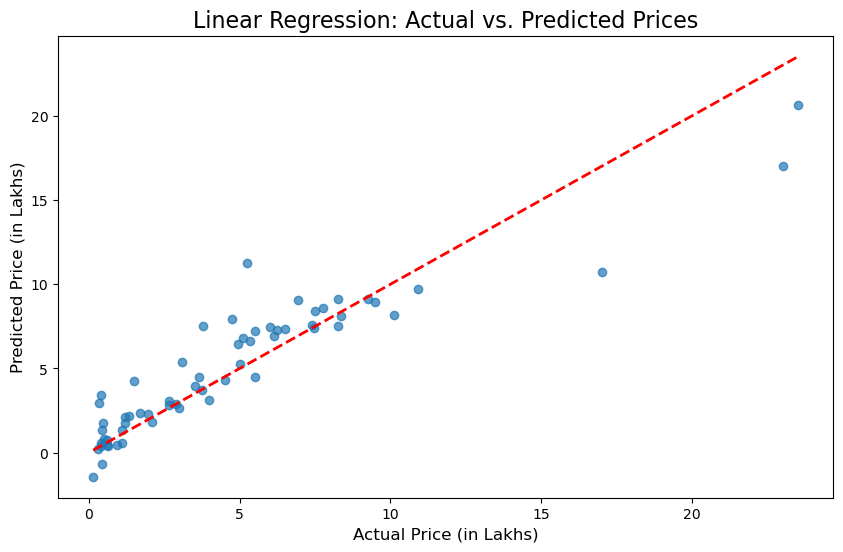

In [4]:
# In[5]:
# Convert categorical columns into numerical using one-hot encoding
# This creates new columns for each category (e.g., 'Fuel_Type_Petrol', 'Fuel_Type_Diesel')
car_df_processed = pd.get_dummies(car_df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

print("--- Processed Data after One-Hot Encoding ---")
print(car_df_processed.head())
# Cell 5: Model Training - Linear Regression (Baseline) 🎯
X = car_df_processed.drop('Selling_Price', axis=1)
y = car_df_processed['Selling_Price']

# --- 5. Split Data into Training and Testing Sets ---
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
# --- 6. Train a Linear Regression Model ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# --- 7. Make Predictions ---
lr_predictions = lr_model.predict(X_test)

# --- 8. Evaluate the Model ---
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("--- Linear Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"R-squared (R²) Score: {lr_r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Linear Regression: Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price (in Lakhs)', fontsize=12)
plt.ylabel('Predicted Price (in Lakhs)', fontsize=12)
plt.show()


--- Random Forest Regressor Model Evaluation ---
Mean Absolute Error (MAE): 0.60
R-squared (R²) Score: 0.96

Note: A higher R² score is better. Random Forest performs significantly better than Linear Regression here.


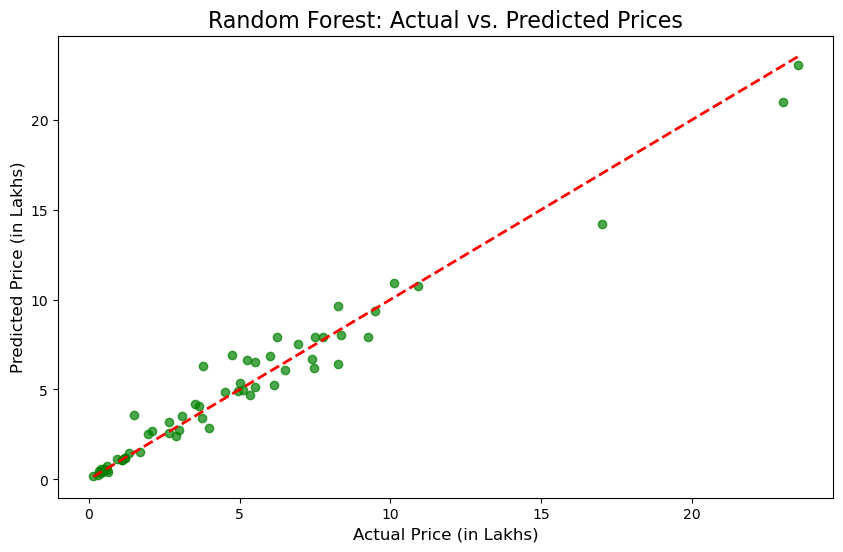

In [5]:
# In[6]:
# Cell 6: Model Training - Random Forest Regressor (Advanced) 🚀

# --- 9. Train a Random Forest Regressor Model ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- 10. Make Predictions ---
rf_predictions = rf_model.predict(X_test)

# --- 11. Evaluate the Model ---
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\n--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-squared (R²) Score: {rf_r2:.2f}")
print("\nNote: A higher R² score is better. Random Forest performs significantly better than Linear Regression here.")


# Visualize predictions vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Random Forest: Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price (in Lakhs)', fontsize=12)
plt.ylabel('Predicted Price (in Lakhs)', fontsize=12)
plt.show()